<a href="https://colab.research.google.com/github/facumdito/final-pavon/blob/facu/PRUEBA_M%C3%8DA_PAVON_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargar repo de github
!git clone https://github.com/facumdito/final-pavon.git
%cd final-pavon

Cloning into 'final-pavon'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 55 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 3.65 MiB | 5.75 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/final-pavon


Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1013 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  940 non-null    float64
 13  studytime   992 non-null    float64
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1013.000000,1044.000000,1044.000000,940.000000,992.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.723593,2.603448,2.387931,1.524468,1.975806,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.233831,1.124907,1.099938,0.734396,0.836491,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


estudiantes totales: 1044
0        5.666667
1        5.333333
2        8.333333
3       14.666667
4        8.666667
          ...    
1039    10.333333
1040    15.333333
1041    10.666667
1042    10.000000
1043    10.666667
Name: FG, Length: 1044, dtype: float64
['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


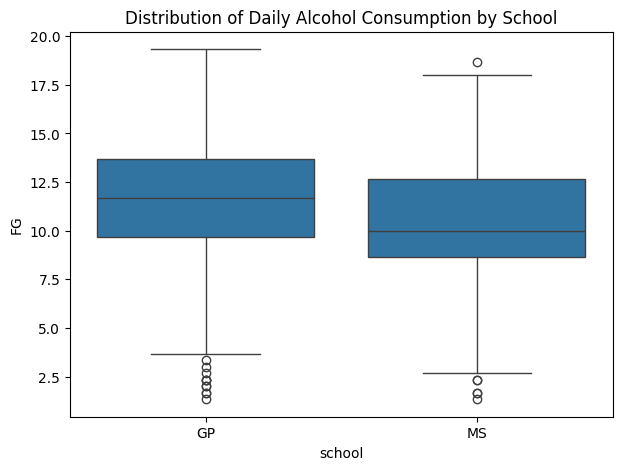

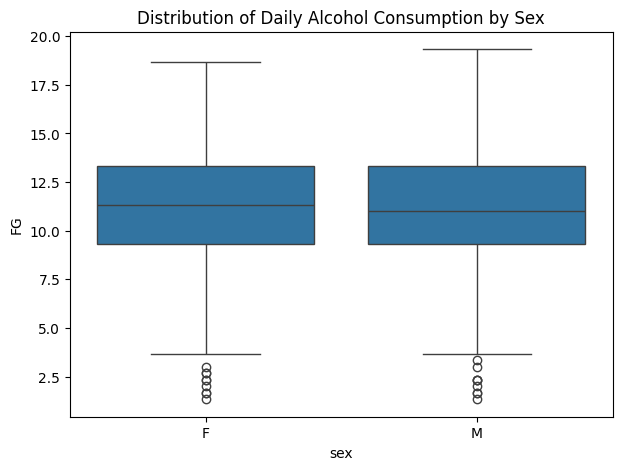

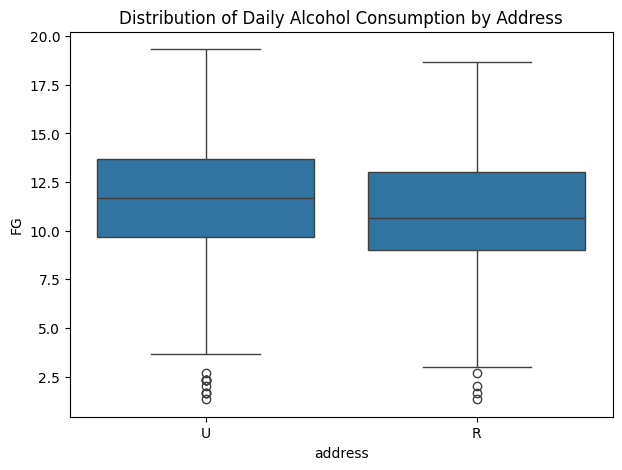

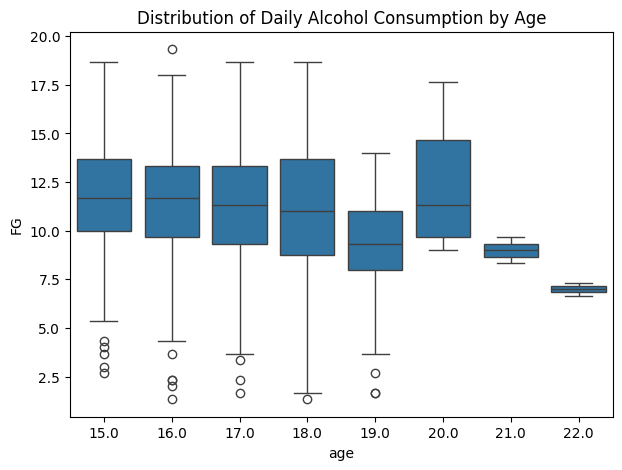

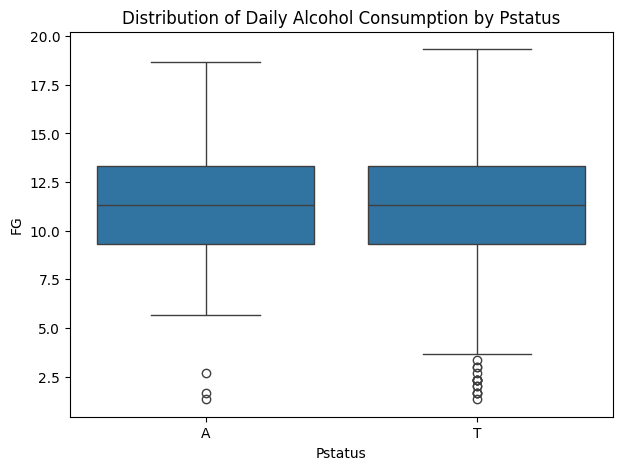

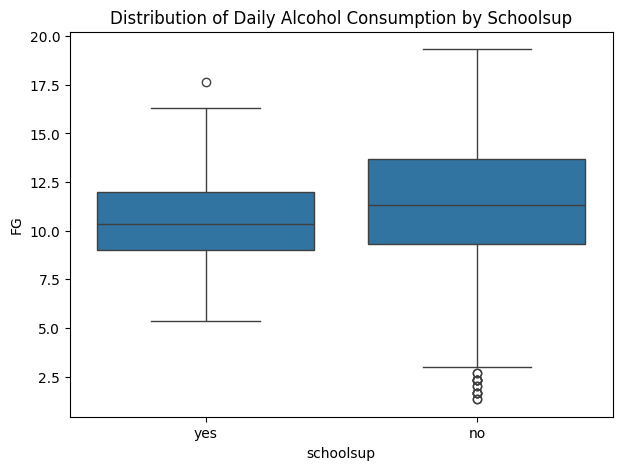

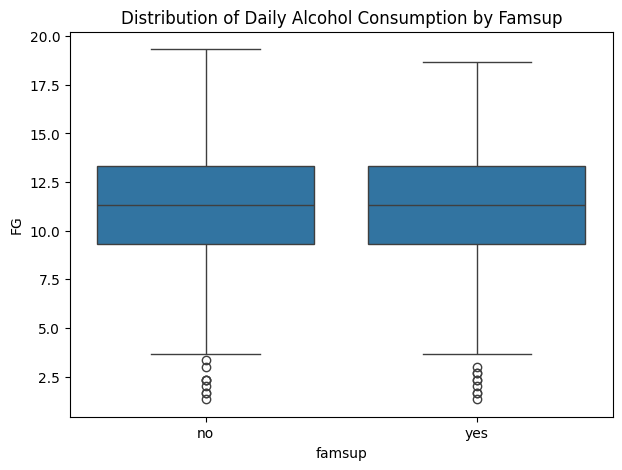

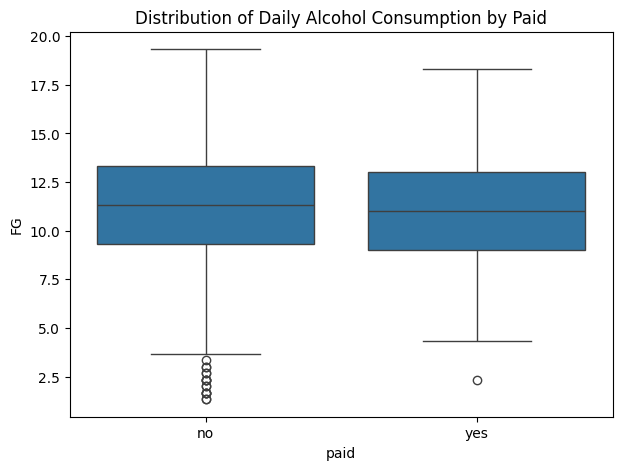

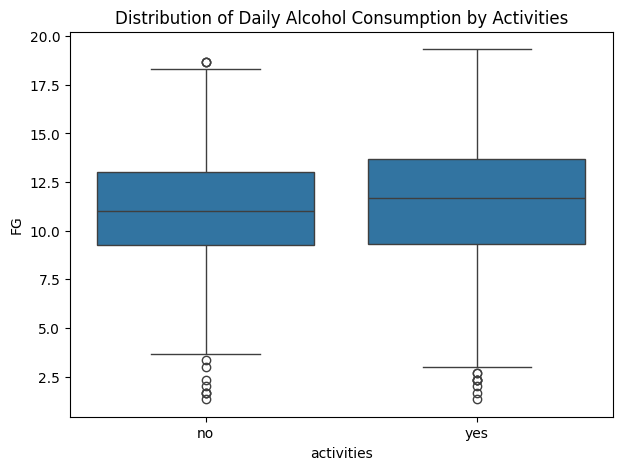

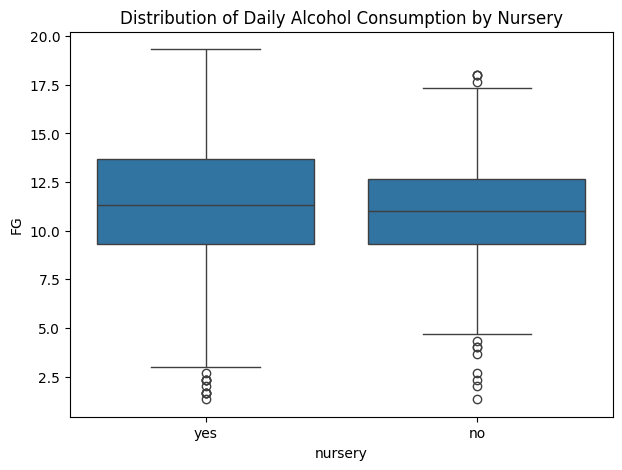

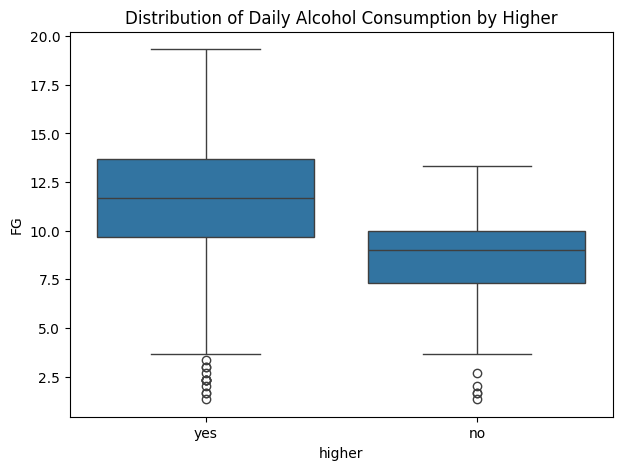

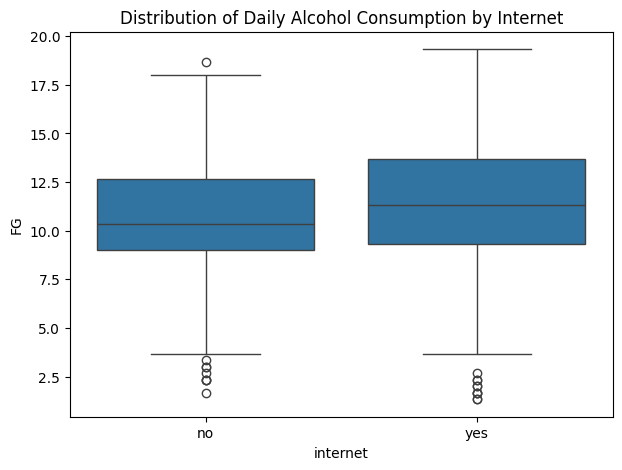

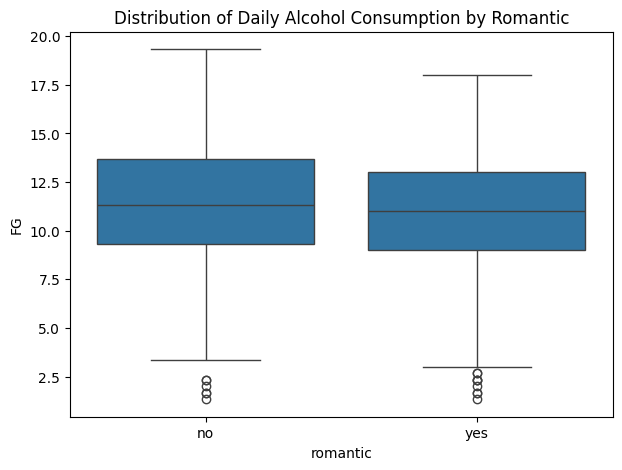

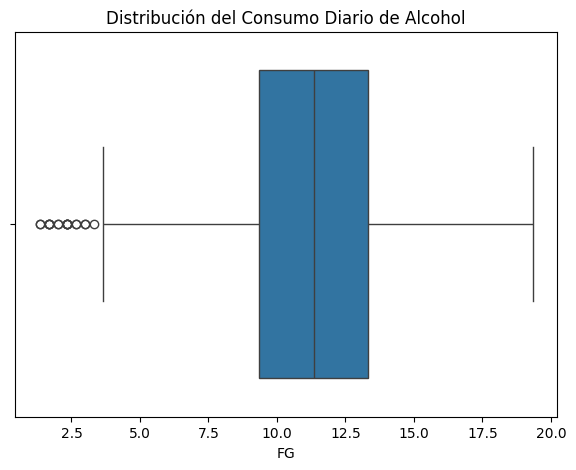

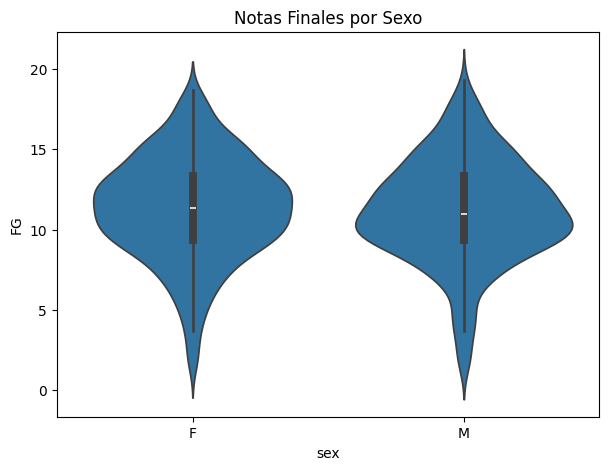

school          0
sex             0
age            31
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime    104
studytime      52
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
FG              0
dtype: int64
  school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A     4     4   at_home   teacher   
1     GP   F  17.0       U     GT3       T     1     1   at_home     other   
3     GP   F  15.0       U     GT3       T     4     2    health  services   
4     GP   F  16.0       U     GT3       T     3     3     othe

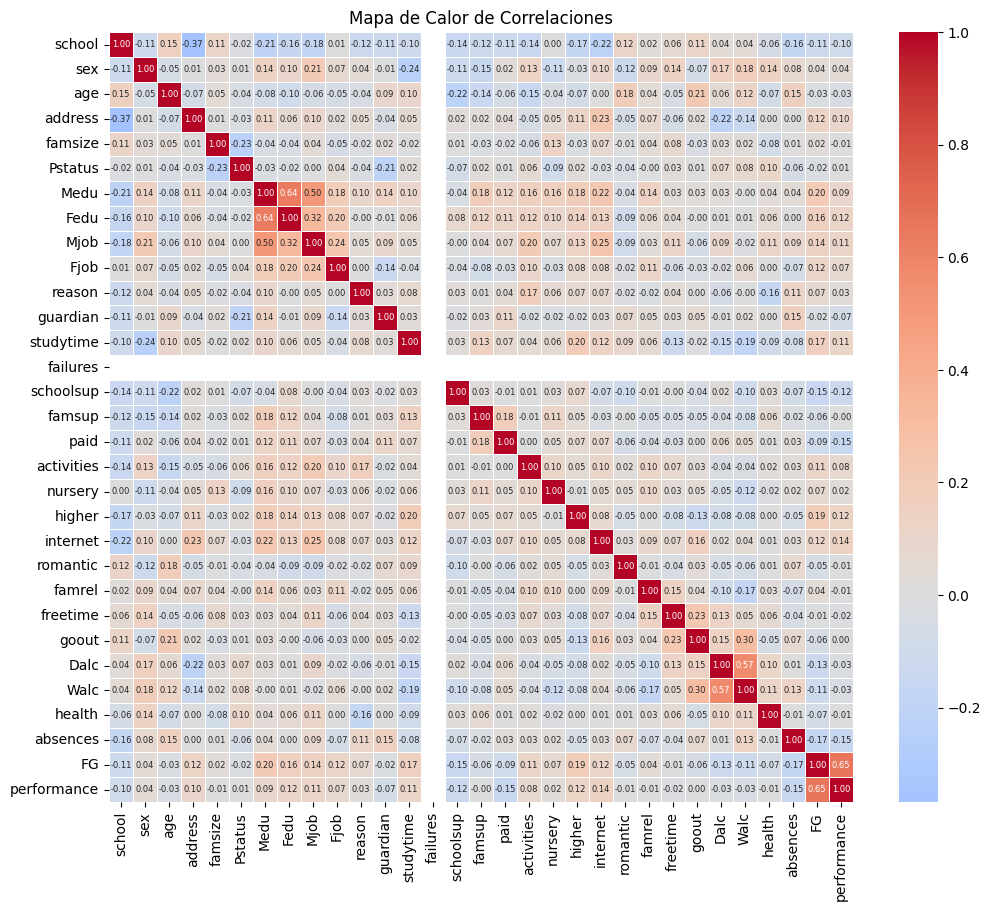



📊 Resultados para Regresión Logística
Accuracy: 0.9433962264150944
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.96      0.98      0.97        87

    accuracy                           0.94       106
   macro avg       0.92      0.88      0.90       106
weighted avg       0.94      0.94      0.94       106



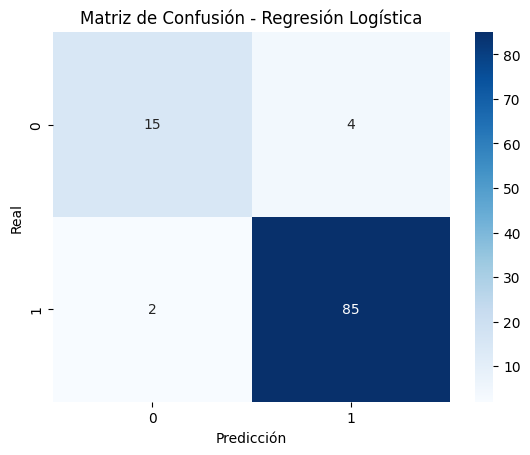



📊 Resultados para Random Forest
Accuracy: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        87

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



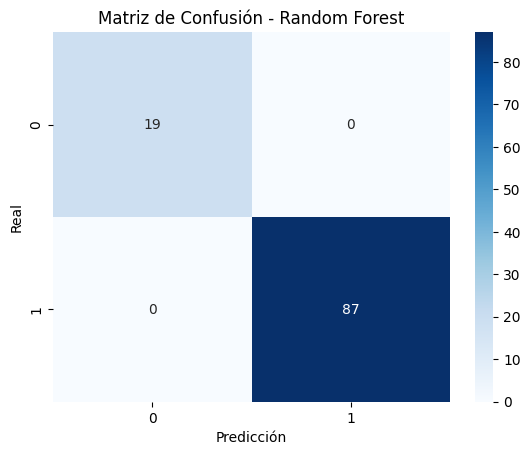



📊 Resultados para Decision Tree
Accuracy: 1.0
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        87

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



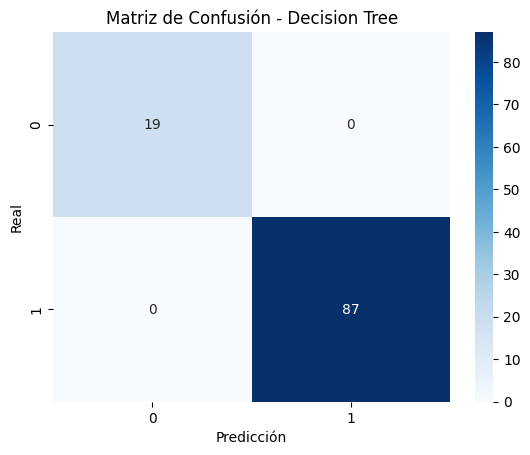



📌 Comparación de Accuracy
Regresión Logística: 0.94
Random Forest: 1.00
Decision Tree: 1.00


In [ ]:
# 📌 TRABAJO FINAL ICD 2025 - MACHINE LEARNING
# Predicción del rendimiento académico de estudiantes

# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
# Cargar los datos desde el archivo CSV
student_data = pd.read_csv('Student Alcohol Consumption_TF.csv')

# Vista general
print("Primeras filas:")
display(student_data.head())
print("\nInfo:")
student_data.info()
print("\nDescripción:")
# Dimesiones del df; filas y coluknas:
student_data.shape
display(student_data.describe())
# Cantidad total de estudiantes analizados:
total_students = len(student_data)
print (f"estudiantes totales: {total_students}")
# Calcular el promedio y crear la nueva columna
student_data["FG"] = student_data[["G1", "G2", "G3"]].mean(axis=1)
print (student_data["FG"])
# =============================
# 2. VISUALIZACIÓN INICIAL
# =============================
binary_vars = []
for col in student_data.columns:
    if col != 'Dalc' and len(student_data[col].unique()) == 2:
        binary_vars.append(col)
print(binary_vars)
if not os.path.exists('plots'):
    os.makedirs('plots')

binary_vars = ['school', 'sex', 'address', 'age', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for var in binary_vars:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=var, y='FG', data=student_data)
    plt.title(f'Distribution of Daily Alcohol Consumption by {var.capitalize()}')
    plt.savefig(os.path.join('plots', f'FG_by_{var}.png'))
    plt.show()
# Boxplot: consumo de alcohol diario
plt.figure(figsize=(7,5))
sns.boxplot(x='FG', data=student_data)
plt.title('Distribución del Consumo Diario de Alcohol')
plt.show()

# Violinplot: nota final
plt.figure(figsize=(7,5))
sns.violinplot(x='sex', y='FG', data=student_data)
plt.title('Notas Finales por Sexo')
plt.show()

# =============================
# 3. LIMPIEZA Y BINARIZACIÓN
# =============================
# Verificar nulos
print(student_data.isnull().sum())

numeric_cols = student_data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = student_data[col].quantile(0.25)
    Q3 = student_data[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (student_data[col] >= Q1 - 1.5 * IQR) & (student_data[col] <= Q3 + 1.5 * IQR)
    student_data = student_data[mask]

if 'traveltime' in student_data.columns:
    student_data.drop(columns='traveltime', inplace=True)

binary_cols = [col for col in student_data.columns if student_data[col].nunique() == 2 and student_data[col].isnull().sum() > 0]
le_dict = {}

for col in binary_cols:
    le = LabelEncoder()
    known = student_data[student_data[col].notnull()]
    unknown = student_data[student_data[col].isnull()]

    if len(unknown) > 0:
        X_train = known.drop(columns=binary_cols)
        y_train = le.fit_transform(known[col])
        X_train = pd.get_dummies(X_train, drop_first=True)

        X_predict = pd.get_dummies(unknown.drop(columns=binary_cols), drop_first=True)
        X_predict = X_predict.reindex(columns=X_train.columns, fill_value=0)

        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        pred = model.predict(X_predict)
        student_data.loc[unknown.index, col] = le.inverse_transform(pred)

    le_dict[col] = le

print(student_data.head())

# Binarizar rendimiento: FG >= 10 es alto (1), si no es bajo (0)
student_data['performance'] = student_data['FG'].apply(lambda x: 1 if x >= 10 else 0)

# Eliminar columnas redundantes
columns_to_drop = ['G1', 'G2', 'G3']
student_data.drop(columns=columns_to_drop, inplace=True)

# Codificar variables categóricas
categorical_cols = student_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    student_data[col] = le.fit_transform(student_data[col])

# =============================
# 4. ANÁLISIS DE CORRELACIÓN
# =============================
corr = student_data.corr()
plt.figure(figsize=(12,10))
plt.title("Mapa de Calor de Correlaciones")
sns.heatmap(corr,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            annot=True,
            fmt='.2f',
            annot_kws={
                "size":6
            }
            )
plt.show()

# =============================
# 5. DIVISIÓN DE DATOS
# =============================
X = student_data.drop('performance', axis=1)
y = student_data['performance']
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# =============================
# 6. ENTRENAMIENTO DE MODELOS
# =============================
# Modelo 1: Regresión Logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Modelo 3: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
# =============================
# 7. EVALUACIÓN DE MODELOS
# =============================
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n\n📊 Resultados para {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

evaluar_modelo("Regresión Logística", y_test, log_pred)
evaluar_modelo("Random Forest", y_test, rf_pred)
evaluar_modelo("Decision Tree", y_test, dt_pred)

# =============================
# 8. COMPARACIÓN FINAL
# =============================
print("\n\n📌 Comparación de Accuracy")
print(f"Regresión Logística: {accuracy_score(y_test, log_pred):.2f}")
print(f"Random Forest: {accuracy_score(y_test, rf_pred):.2f}")
print(f"Decision Tree: {accuracy_score(y_test, dt_pred):.2f}")


# **✅ Conclusión final del análisis**
A lo largo de este trabajo aplicamos técnicas de Machine Learning para predecir si un estudiante tendrá un rendimiento académico alto o bajo, utilizando datos reales de estudiantes portugueses.

Luego de analizar el dataset, entrenar modelos y evaluar sus resultados, llegamos a varias conclusiones importantes:

🧠 El rendimiento académico está fuertemente influenciado por factores como la cantidad de materias desaprobadas, las horas de estudio, el consumo de alcohol, las ausencias y el nivel educativo de los padres.

🌱 Los estudiantes que estudian más, se ausentan menos y tienen mayor apoyo familiar tienden a rendir mejor.

⚙️ El modelo de Random Forest tuvo mejor desempeño que la regresión logística, mostrando mayor precisión y una mejor capacidad de detectar correctamente tanto a los alumnos de alto rendimiento como a los de bajo rendimiento.

📈 Este tipo de análisis podría ayudar en el futuro a identificar a tiempo a estudiantes en riesgo, y tomar decisiones educativas más personalizadas y efectivas.

